## TASK-1

In [1]:
URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
data = pd.read_csv(URL)

In [4]:
data.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


### First Answer

**Median value of owner-occupied homes" provide a boxplot**

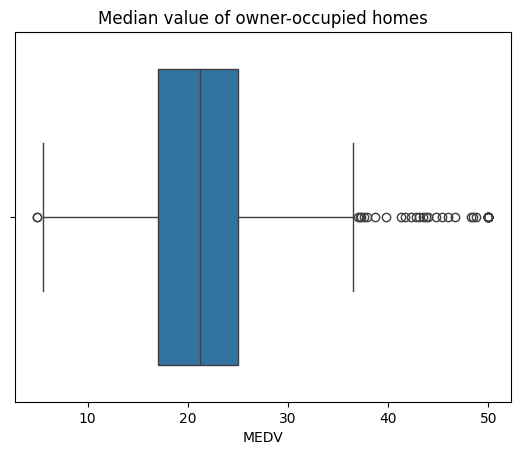

In [5]:
ax = sns.boxplot(x = 'MEDV', data = data)
ax.set_title('Median value of owner-occupied homes')
plt.show()

### Second Answer

**Bar plot for the Charles river variable**





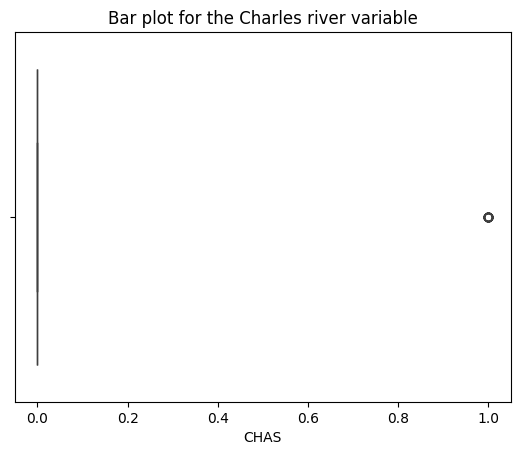

In [6]:
ax = sns.boxplot(x = 'CHAS', data = data)
ax.set_title('Bar plot for the Charles river variable')
plt.show()

### Third Answer

**Boxplot for the MEDV variable vs the AGE variable**

In [7]:
data.loc[(data['AGE'] <= 35), 'Age_Group'] = 'thirty_five_lower'
data.loc[(data['AGE'] > 35) & (data['AGE'] < 70), 'Age_Group'] = 'btw_thirty_five_and_seventy' # Use 'AGE' column for comparison
data.loc[(data['AGE'] >= 70), 'Age_Group'] = 'above_seventy'

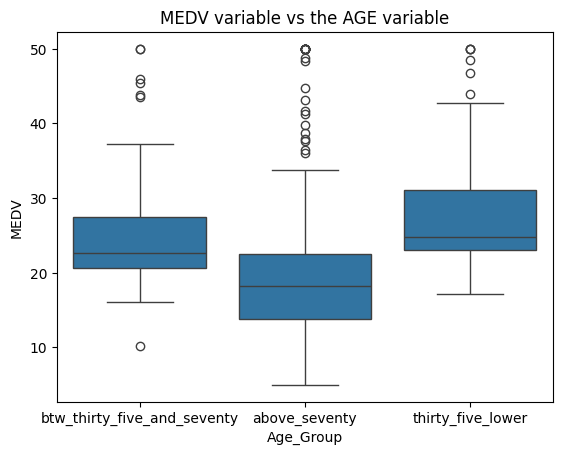

In [8]:
ax = sns.boxplot(x='Age_Group', y='MEDV', data=data)
ax.set_title('MEDV variable vs the AGE variable')
plt.show()

### Fourth Answer

**scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town**

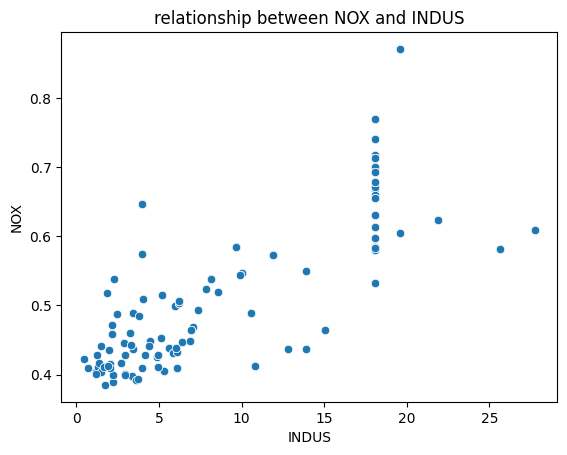

In [9]:
ax = sns.scatterplot(x='INDUS', y='NOX', data=data)
ax.set_title('relationship between NOX and INDUS')
plt.show()

Here, we can say that as the proportion of non-retail business acres per town increases, Nitric oxide concentrations also increases. The reason might be while businesses are growing and increase in use of vehicles tender  the emission of nitric oxide  increases.

### Fifth Answer

**Histogram for the pupil to teacher ratio variable**

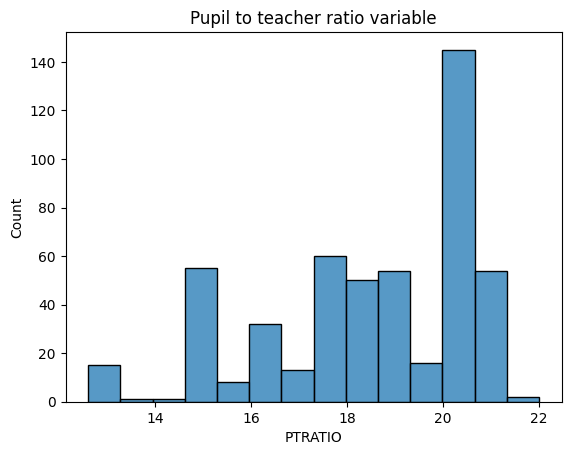

In [10]:
ax = sns.histplot(x='PTRATIO', data=data)
ax.set_title('Pupil to teacher ratio variable')
plt.show()

## TASK-2

In [11]:
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

## First Answer

**Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)**

* Null Hypothesis (H0): There is no significant difference in the median value of houses bounded by the Charles River (CHAS=1) compared to those that are not (CHAS=0). (Mean difference = 0)

* Alternative Hypothesis(H1): There is a significant difference in the median value of houses bounded by the Charles River (CHAS=1) compared to those that are not (CHAS=0). (Mean difference ≠ 0)

In [12]:
# ttest using Regression Analysis

x = data['CHAS']
y = data['MEDV']

x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
predictions = model.predict(x)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     15.97
Date:                Fri, 05 Jul 2024   Prob (F-statistic):           7.39e-05
Time:                        08:29:26   Log-Likelihood:                -1832.3
No. Observations:                 506   AIC:                             3669.
Df Residuals:                     504   BIC:                             3677.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.0938      0.418     52.902      0.000      21.273      22.914
CHAS           6.3462      1.588      3.996      0.000       3.226       9.466
==============================================================================
Omnibus:                       81.923   Durbin-Watson:                   0.579
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              125.534
Skew:                           1.043   Prob(JB):                     5.50e-28
Kurtosis:                       4.267   Cond. No.                         3.96
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* A T-test for independent samples was conducted, and the results showed a p-value less than 0.05. This indicates that we reject the null hypothesis and accept the alternative hypothesis.


* Here, we conclude that; probability is < 0.05  indicating a statistically significant difference.The proximity to the Charles River significantly affects the median house values.

## Second Answer

**Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)**

* Null Hypothesis (H0): There is no significant difference in median house values (MEDV) across different categories of AGE.

* Alternative Hypothesis (H1): There is a significant difference in median house values (MEDV) across at least one pair of categories of AGE.

In [13]:
# 1st Method

lm = ols('MEDV ~ Age_Group', data = data).fit()
model = sm.stats.anova_lm(lm)
print(model)

              df        sum_sq      mean_sq         F        PR(>F)
Age_Group    2.0   5401.731883  2700.865942  36.40765  1.710501e-15
Residual   503.0  37314.563532    74.184023       NaN           NaN


In [14]:
# 2nd Method

x = pd.get_dummies(data['Age_Group']).astype(float)
y = data['MEDV']
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
pridictions = model.predict(x)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.126
Model:                            OLS   Adj. R-squared:                  0.123
Method:                 Least Squares   F-statistic:                     36.41
Date:                Fri, 05 Jul 2024   Prob (F-statistic):           1.71e-15
Time:                        08:29:33   Log-Likelihood:                -1806.0
No. Observations:                 506   AIC:                             3618.
Df Residuals:                     503   BIC:                             3631.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          18.1292      0.321     56.399      0.000      17.498      18.761
above_seventy                   1.6642      0.482      3.451      0.001       0.717       2.612
btw_thirty_five_and_seventy     6.8184      0.627     10.875      0.000       5.587       8.050
thirty_five_lower               9.6466      0.715     13.496      0.000       8.242      11.051
==============================================================================
Omnibus:                      158.454   Durbin-Watson:                   0.629
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              393.356
Skew:                           1.592   Prob(JB):                     3.84e-86
Kurtosis:                       5.919   Cond. No.                     1.31e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.27e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

* After conducting the ANOVA test, p-value less than 0.05 indicates that we reject the null hypothesis and Accecpt the Alternate Hypothesis

* Here we conclde that, there is a statistically significant differences in median house values (MEDV) across different proportions of owner-occupied units built prior to 1940 (AGE).

## Third Answer

**Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)**

* Hypothesis(H0):  There is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.

* Alternate Hypothesis(H1): There is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town

In [15]:
# Pearson correlation test using Statistical Analysis
stats.pearsonr(data['NOX'], data['INDUS'])

PearsonRResult(statistic=0.7636514469209151, pvalue=7.913361061239527e-98)

In [16]:
# Pearson correlation Using Regression Analysis

x = data['INDUS']
y = data['NOX']

x = sm.add_constant(x)

model = sm.OLS(y,x).fit()

prediction = model.predict(x)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    NOX   R-squared:                       0.583
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     705.1
Date:                Fri, 05 Jul 2024   Prob (F-statistic):           7.91e-98
Time:                        08:29:38   Log-Likelihood:                 594.45
No. Observations:                 506   AIC:                            -1185.
Df Residuals:                     504   BIC:                            -1176.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4110      0.006     64.710      0.000       0.399       0.424
INDUS          0.0129      0.000     26.554      0.000       0.012       0.014
==============================================================================
Omnibus:                       35.023   Durbin-Watson:                   0.279
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               47.995
Skew:                           0.548   Prob(JB):                     3.78e-11
Kurtosis:                       4.038   Cond. No.                         25.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* After conducting the Pearson test, p-value less than 0.05 indicates that we reject the null hypothesis and Accecpt the Alternate Hypothesis

* Here we conclude that, there is indeed a statistically significant correlation between Nitric oxide concentrations (NOX) and proportion of non-retail business acres per town (INDUS).

## Fourth Answer

**What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)**

* Hypothesis(H0) : : There is no effect of an additional weighted distance to the five Boston employment centers on the median value of owner-occupied homes.

* Alternate Hypothesis(H1)  : : There is  effect of an additional weighted distance to the five Boston employment centers on the median value of owner-occupied homes.

In [17]:
x = data['DIS']
y = data['MEDV']

x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
predictions = model.predict(x)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 05 Jul 2024   Prob (F-statistic):           1.21e-08
Time:                        08:29:41   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* After conducting the Regression Analysis, p-value less than 0.05 indicates that we reject the null hypothesis and Accecpt the Alternate Hypothesis.

* Here we conclude that, There is significant effect of an additional weighted distance to the five Boston employment centers (DIS) on the median value of owner-occupied homes (MEDV)